In [ ]:
!python --version

Python 3.10.11


In [ ]:
#Read the CSV Files
#!pip install pandas
#!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

ms = pd.read_csv('Microsurvey_Dataframe.csv')
#print(ms.head())

#print(ms.dtypes)
#eod = pd.read_csv(r'C:\Users\krist\OneDrive\Desktop\Fulbright\Research\EOD_Dataframe.csv')
#print(eod.head())

<ipython-input-4-d21f052498e5>:11: DtypeWarning: Columns (5,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ms = pd.read_csv('Microsurvey_Dataframe.csv')


In [ ]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['serif']))
font

'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf'

<ipython-input-7-2f0e243c1244>:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_total = _df.sum(axis=1)


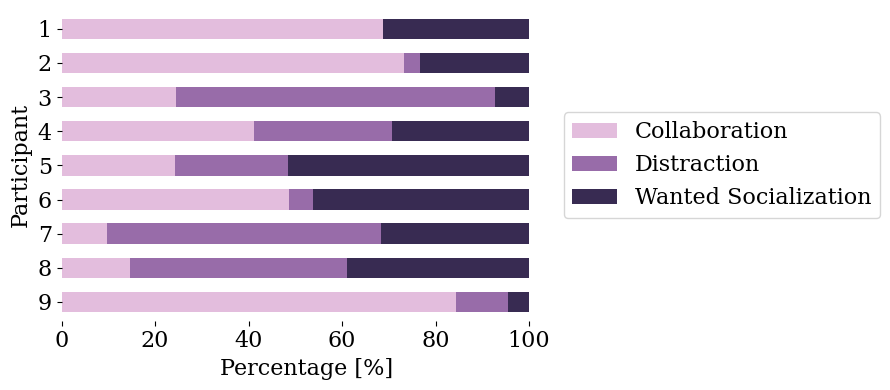

In [ ]:
#Make personalized profile stacked bar chart for the categorization question
#pulled code from Budslab Github
#only works for Python 3.9.16
plt.rcParams['font.family'] = ['serif'] # Set font

def vote_by_user(
    dataframe,
    dataset="dorn",
    show_percentages=False,
    preference_label="thermal_cozie",
    fontsize=16,
):
    """
    Original code by Dr. Federico Tartarini
    https://github.com/FedericoTartarini
    """

    df = dataframe.copy()
    #df[preference_label] = df[preference_label].map(
    #    {"Collaboration": "Collaboration", "Distraction": "Distraction", "Wanted Socialization": "Wanted Socialization"}
    #)
    _df = (
        df.groupby(["id_participant", preference_label])[preference_label]
        .count()
        .unstack(preference_label)
    )
    _df.reset_index(inplace=True)

    df_total = _df.sum(axis=1)
    df_rel = _df[_df.columns[1:]].div(df_total, 0) * 100
    df_rel["id_participant"] = _df["id_participant"]

    # sort properly
    df_rel["id_participant"] = df_rel["id_participant"].str.replace(dataset, "").astype(int)
    df_rel = df_rel.sort_values(by=["id_participant"], ascending=False)
    #df_rel["id_participant"] = dataset + df_rel["id_participant"].astype(str)
    df_rel = df_rel.reset_index(drop=True)

    # plot a Stacked Bar Chart using matplotlib
    #rc("text.latex", preamble=r"\usepackage{cmbright}")
    #rc("text", usetex=True)
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    df_rel.plot(
        x="id_participant",
        kind="barh",
        stacked=True,
        mark_right=True,
        cmap=LinearSegmentedColormap.from_list(
            preference_label,
            sns.cubehelix_palette(dark=0.2, light=0.8, rot= 0.2, start=0, n_colors=3).as_hex(),
            N=3,
        ),
        width=0.6,
        figsize=(900*px, 400*px),
    )

    plt.legend(
        bbox_to_anchor=(1, 0.5),
        loc="center left",
        #borderaxespad=0,
        #ncol=1,
       # frameon=False,
       fontsize=fontsize,
    )
    sns.despine(left=True, bottom=True, right=True, top=True)

    plt.tick_params(labelsize=fontsize)
    plt.xlabel("Percentage [%]", size=fontsize)
    plt.ylabel("Participant", size=fontsize)

    if show_percentages:
        # add percentages
        for index, row in df_rel.drop(["id_participant"], axis=1).iterrows():
            cum_sum = 0
            for ix, el in enumerate(row):
                if np.isnan(el):
                    el = 0
                    
                if ix == 1:
                    plt.text(
                        cum_sum + el / 2 if not np.isnan(cum_sum) else el / 2,
                        index,
                        str(int(np.round(el, 0))) + "\%",
                        va="center",
                        ha="center",
                        size=fontsize,
                    )
                cum_sum += el

    plt.tight_layout()
    plt.savefig(f"vote_dist.png", pad_inches=0, dpi=300)
    plt.savefig('vote_dist.svg')
    plt.show()

#df_responses = df_responses[df_responses['space_id'] != -1] # only instrumented spaces

#get_overview(df_responses, df_background, userid="id_participant")
vote_by_user(ms, 'thesh', show_percentages=False, preference_label="ws_category")

In [ ]:
#Make stacked bar charts for each objective question from the microsurvey
def stacked_bar2(df, qnumber, ax):
  '''
  Function to plot subplots (one bar)
  Arguments: 
   - df, Pandas DataFrame
   - index, integer, row of dataframe (=Question)
   - ax, Matplotliib axes object
  '''

  # Settings
  fontsize = 16
  question_text = df.index[qnumber-1]

  # Pick one row of dataframe
  row = df.loc[question_text] # Select row
  row[row.notnull()]   # Remove empty fields
  df2 = pd.DataFrame(row[row.notnull()]) # Convert Series to DataFrame
  df2 = df2.sort_values(by=question_text, ascending=False) # Order values in descending order
  df2 = df2.T # Transpose dataframe
  
  # Set colors
  colors = {}
  colors[1] = sns.cubehelix_palette(dark=0.2, light=0.8, rot= 0.2, start=0, n_colors=len(df2.columns)).as_hex()
  colors[2] = sns.cubehelix_palette(dark=0.2, light=0.8, rot= 0.0, start=2, n_colors=len(df2.columns)).as_hex()
  colors[3] = sns.cubehelix_palette(dark=0.2, light=0.8, rot=-0.2, start=0, n_colors=len(df2.columns)).as_hex()
  colors[4] = sns.cubehelix_palette(dark=0.2, light=0.8, rot= 0.0, start=1, n_colors=len(df2.columns)).as_hex()

  #Plot data
  df2.plot(ax=ax, kind='barh', stacked=True, width=0.5, color=colors[qnumber]) # Plot stacked bar chart
  ax.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=fontsize) # Show Legend

  # x-axis
  ax.set_xticks([]) # Remove x-tick marks
  _=ax.set_xticklabels([]) # Remove x-tick labels
  ax.set_xlim([0,1]) # Set limit of x-axis

  # y-axis
  ax.set_yticks([0]) # Add single y-tick
  _=ax.set_yticklabels([question_text], fontsize=fontsize) # Set y-tick label
  ax.yaxis.set_tick_params(left=False) # Turn off y-tick mark

  # Remove frame 
  ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

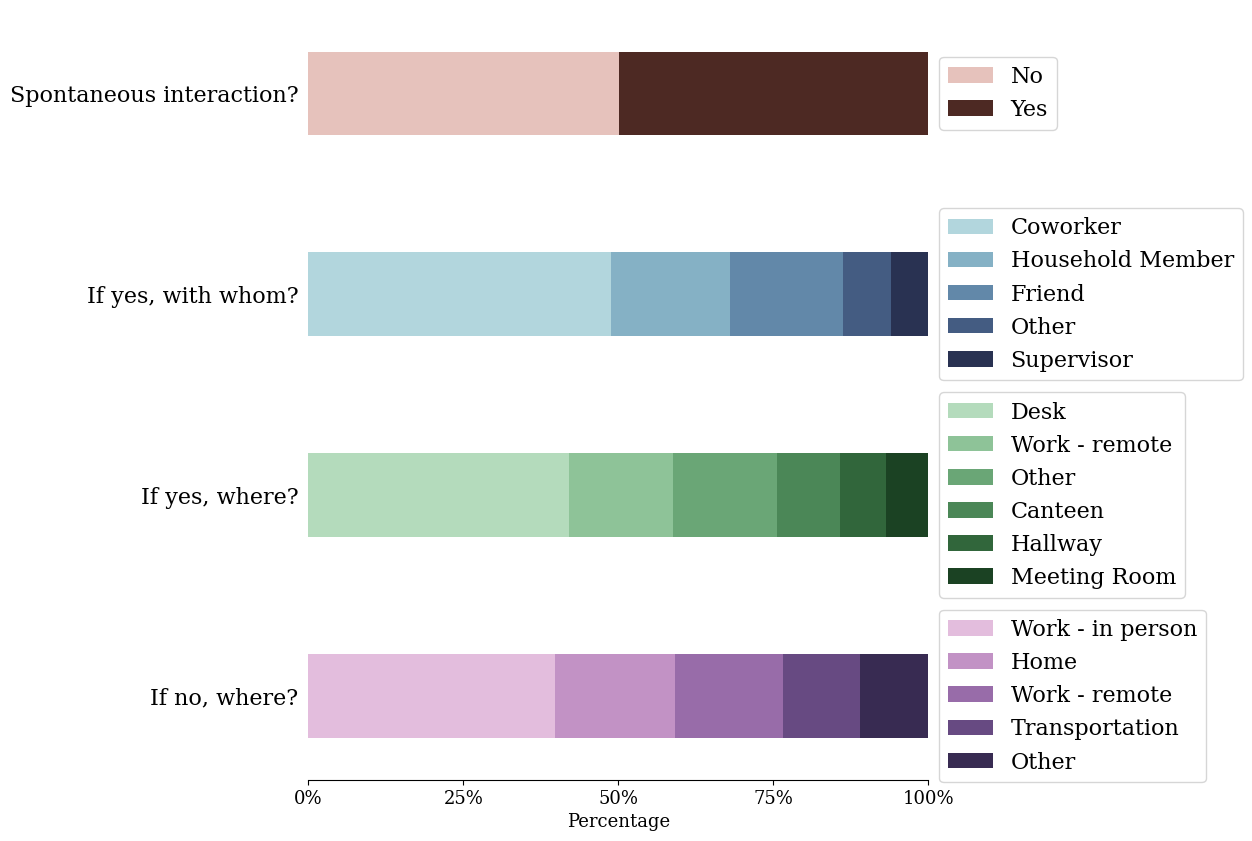

In [ ]:
# Read data
df = pd.read_csv('simp_stack_df.csv')
pivoted_df = df.pivot_table(index='question_number', columns='response', values='count', aggfunc='sum')
pct_df = pivoted_df.apply(lambda x: x/x.sum(), axis=1)
row_names = {1:'If no, where?',
             2:'If yes, where?', 
             3:'If yes, with whom?', 
             4:'Spontaneous interaction?'}
pct_df = pct_df.rename(index=row_names)

# Set up figure
fontsize = 13
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.rcParams['font.family'] = ['serif'] # Set font
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(800*px, 1000*px))

# Plot bars
stacked_bar2(pct_df, 1, ax[3])
stacked_bar2(pct_df, 2, ax[2])
stacked_bar2(pct_df, 3, ax[1])
stacked_bar2(pct_df, 4, ax[0])

# Add x-axis for last plot
ax[3].spines['bottom'].set_visible(True)
ax[3].set_visible(True)
ax[3].set_xlabel('Percentage', fontsize=fontsize)
ax[3].set_xticks([0, 0.25, 0.5, 0.75, 1])
_=ax[3].set_xticklabels(['0%', '25%', '50%', '75%', '100%'], fontsize=fontsize)

fig.savefig(f"nobj_q2.png", bbox_inches='tight')
fig.savefig(f"nobj_q2.svg", bbox_inches='tight')